# **1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
df= pd.read_csv('/content/dataset_with_clusters.csv')

# Periksa beberapa baris pertama data
print(df.head())


     Income  Marital_Status  Expenses  Cluster
0 -1.066487               1 -0.354236        2
1  0.380126               1  0.439212        0
2  0.617615               0  0.706424        3
3 -0.688666               0 -0.370617        1
4 -1.444643               0 -0.037881        1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          1792 non-null   float64
 1   Marital_Status  1792 non-null   int64  
 2   Expenses        1792 non-null   float64
 3   Cluster         1792 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 56.1 KB


In [ ]:
df.describe()

,Income,Marital_Status,Expenses,Cluster
count,1792.000000,1792.000000,1792.000000,1792.000000
mean,0.006874,0.347098,0.205799,1.660714
std,0.794287,0.476180,0.617774,1.077591
min,-1.527022,0.000000,-0.400307,0.000000
25%,-0.507343,0.000000,-0.337855,1.000000
50%,-0.014183,0.000000,-0.027643,2.000000
75%,0.490848,1.000000,0.652163,3.000000
max,18.775747,1.000000,2.179678,3.000000


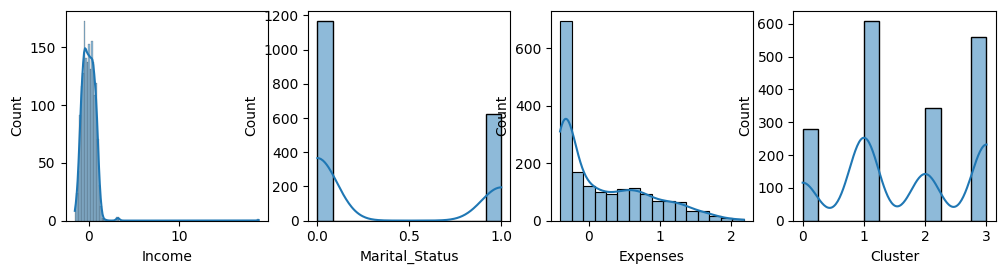

In [ ]:
# Distribusi semua fitur
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True)

In [ ]:
# Clipping nilai ekstrem
df['Expenses'] = df['Expenses'].clip(lower=df['Expenses'].quantile(0.01), upper=df['Expenses'].quantile(0.99))
df['Income'] = df['Income'].clip(lower=df['Income'].quantile(0.01), upper=df['Income'].quantile(0.99))

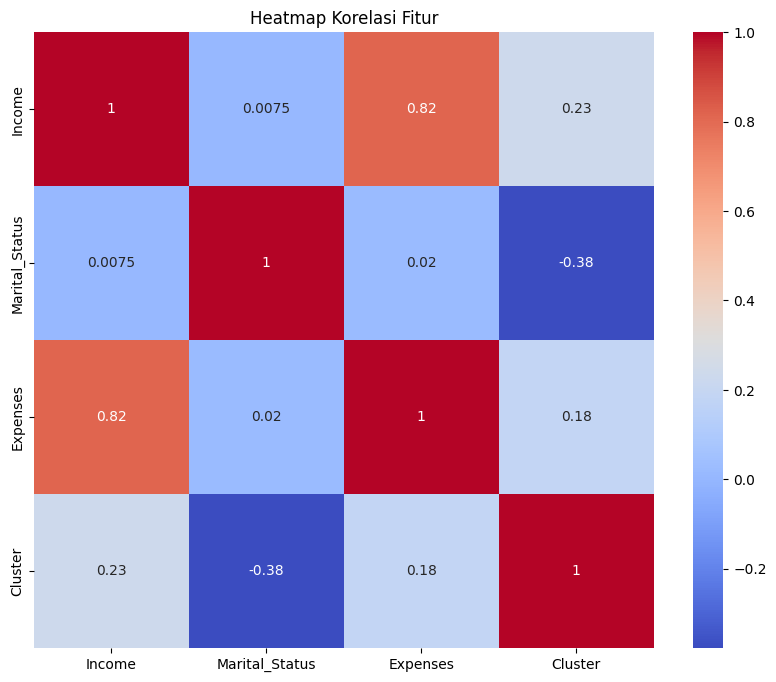

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

# **3. Data Splitting**

In [ ]:
# Misalkan kita ingin membagi target menjadi dua kelas: 'High' dan 'Low' berdasarkan threshold
threshold = df['Expenses'].median()  # Menggunakan median sebagai threshold

# Mengubah target menjadi kategori: 'High' (1) dan 'Low' (0)
y_class = (df['Expenses'] > threshold).astype(int)

# Membagi data menjadi train dan test
X = df.drop('Expenses', axis=1)  # Menggunakan kolom lainnya sebagai fitur
y = y_class  # Target yang sudah dikategorikan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi scaler
scaler = MinMaxScaler()

# Pilih semua kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Terapkan MinMaxScaler
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

     Income  Marital_Status  Expenses   Cluster
0  0.107179             1.0  0.017975  0.666667
1  0.652431             1.0  0.384579  0.000000
2  0.741945             0.0  0.508042  1.000000
3  0.249586             0.0  0.010407  0.333333
4  0.000000             0.0  0.164144  0.333333


In [ ]:
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split (20% data latih dan 80% data uji)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1433, 3), y_train=(1433,)
Test set shape: X_test=(359, 3), y_test=(359,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [ ]:
# Inisialisasi model klasifikasi
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Melatih model knn
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Melatih model dt
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Melatih model rf
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Melatih model svm
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Validasi latih model
print("Model Sudah Dibuat")

Model Sudah Dibuat


1. KNeighborsClassifier (KNN)

Proses Kerja:

KNeighborsClassifier adalah model berbasis instance yang mengklasifikasikan data berdasarkan tetangga terdekatnya.
Model ini menghitung jarak (misalnya, Euclidean distance) antara data uji dengan data latih.
Setelah itu, model memilih k tetangga terdekat dan memberikan label kelas berdasarkan mayoritas kelas dari k tetangga tersebut.

2. DecisionTreeClassifier

Proses Kerja:

DecisionTreeClassifier membangun model berbentuk pohon keputusan, yang membagi data menjadi cabang berdasarkan fitur dengan cara yang mengurangi impurity (misalnya, Gini Impurity atau Entropy).
Setiap cabang pohon mewakili keputusan atau aturan berdasarkan fitur tertentu, dan cabang terakhir (daun) menunjukkan kelas prediksi untuk data yang sesuai dengan aturan tersebut.

3.   RandomForestClassifier

Proses Kerja:

RandomForestClassifier adalah model ensemble yang terdiri dari beberapa pohon keputusan.
Setiap pohon keputusan dibangun menggunakan bootstrap aggregating (bagging), di mana sampel acak dari data pelatihan digunakan untuk membangun setiap pohon.
Prediksi akhir diperoleh dengan melakukan voting mayoritas dari seluruh pohon.
Model ini mengurangi overfitting yang sering terjadi pada pohon keputusan tunggal.

4. SVM (Support Vector Machine)

Proses Kerja:

SVM mencari hyperplane yang memisahkan data dari berbagai kelas dengan margin terbesar.
Dengan menggunakan kernel trick, SVM dapat menangani data non-linier dengan memetakan data ke ruang berdimensi lebih tinggi.
SVM dapat digunakan baik untuk klasifikasi biner maupun multikelas.

## **b. Evaluasi Model Klasifikasi**

In [ ]:
# Menghitung metrik evaluasi untuk setiap model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, f1, precision, recall, conf_matrix

In [ ]:
# Evaluasi untuk knn
accuracy_knn, f1_knn, precision_knn, recall_knn, conf_matrix_knn = evaluate_model(y_test, y_pred_knn)
print("Evaluasi Model KNN:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_knn}\n")

Evaluasi Model KNN:
Accuracy: 0.8719
F1-Score: 0.8693
Precision: 0.8547
Recall: 0.8844
Confusion Matrix:
[[160  26]
 [ 20 153]]



In [ ]:
# Evaluasi untuk Decision Tree
accuracy_dt, f1_dt, precision_dt, recall_dt, conf_matrix_dt = evaluate_model(y_test, y_pred_dt)
print("Evaluasi Model Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_dt}\n")


Evaluasi Model Decision Tree:
Accuracy: 0.8524
F1-Score: 0.8490
Precision: 0.8371
Recall: 0.8613
Confusion Matrix:
[[157  29]
 [ 24 149]]



In [ ]:
# Evaluasi untuk Random Forest
accuracy_rf, f1_rf, precision_rf, recall_rf, conf_matrix_rf = evaluate_model(y_test, y_pred_rf)
print("Evaluasi Model Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}\n")

Evaluasi Model Random Forest:
Accuracy: 0.8552
F1-Score: 0.8506
Precision: 0.8457
Recall: 0.8555
Confusion Matrix:
[[159  27]
 [ 25 148]]



In [ ]:
# Evaluasi untuk SVM
accuracy_svm, f1_svm, precision_svm, recall_svm, conf_matrix_svm = evaluate_model(y_test, y_pred_svm)
print("Evaluasi Model SVM:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}\n")

Evaluasi Model SVM:
Accuracy: 0.8969
F1-Score: 0.8902
Precision: 0.9146
Recall: 0.8671
Confusion Matrix:
[[172  14]
 [ 23 150]]



In [ ]:
# Membuat confusion matrix untuk melihat detail prediksi benar dan salah.
def print_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix untuk {model_name}:")
    print(cm)
    print("True Positive (TP):", cm[1, 1])
    print("True Negative (TN):", cm[0, 0])
    print("False Positive (FP):", cm[0, 1])
    print("False Negative (FN):", cm[1, 0])
    print("\n")

# Menampilkan confusion matrix untuk KNN
print_confusion_matrix(y_test, y_pred_knn, "KNN")

# Menampilkan confusion matrix untuk Decision Tree
print_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Menampilkan confusion matrix untuk Random Forest
print_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Menampilkan confusion matrix untuk SVM
print_confusion_matrix(y_test, y_pred_svm, "SVM")

Confusion Matrix untuk KNN:
[[160  26]
 [ 20 153]]
True Positive (TP): 153
True Negative (TN): 160
False Positive (FP): 26
False Negative (FN): 20


Confusion Matrix untuk Decision Tree:
[[157  29]
 [ 24 149]]
True Positive (TP): 149
True Negative (TN): 157
False Positive (FP): 29
False Negative (FN): 24


Confusion Matrix untuk Random Forest:
[[159  27]
 [ 25 148]]
True Positive (TP): 148
True Negative (TN): 159
False Positive (FP): 27
False Negative (FN): 25


Confusion Matrix untuk SVM:
[[172  14]
 [ 23 150]]
True Positive (TP): 150
True Negative (TN): 172
False Positive (FP): 14
False Negative (FN): 23




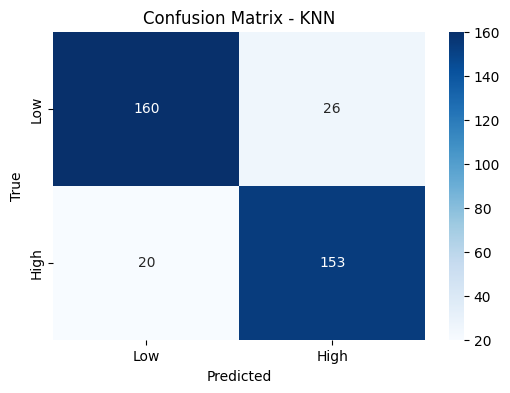

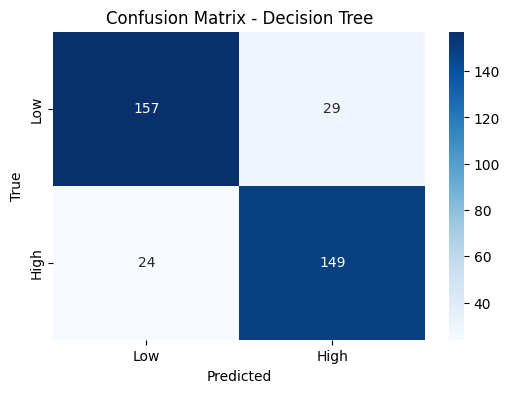

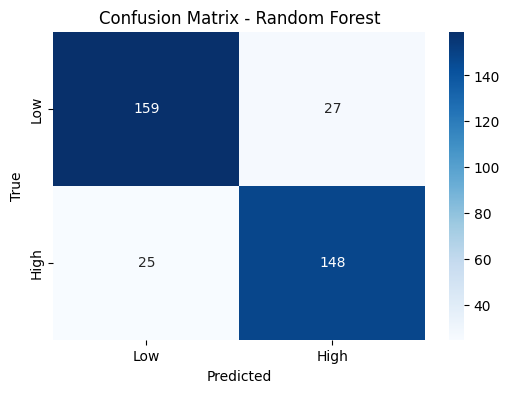

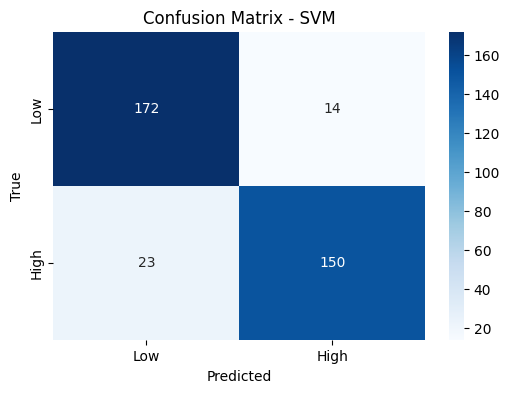

In [ ]:
# Kita buat visualisasi Confusion Matrixnya
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Menampilkan confusion matrix untuk setiap model
plot_confusion_matrix(y_test, y_pred_knn, "KNN")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

In [ ]:
# Fungsi untuk menghitung dan menampilkan Akurasi dan F1-Score
def print_metrics(model, X_train, X_test, y_train, y_test, y_pred, model_name):
    # Prediksi pada training set
    y_train_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred, average='weighted')

    # Akurasi pada Testing Set
    accuracy_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Metriks:")
    print(f"Training Accuracy: {accuracy_train*100:.2f}%")
    print(f"Training F1-Score: {f1_train*100:.2f}%")
    print(f"Testing Accuracy: {accuracy_test*100:.2f}%")
    print(f"Testing F1-Score: {f1_test*100:.2f}%")

    # Check if they meet the minimum 87% threshold
    if accuracy_test >= 0.87 and f1_test >= 0.87:
        print(f"{model_name} telah memenuhi persyaratan akurasi minimum dan F1-Score!")
    else:
        print(f"{model_name} tidak memenuhi persyaratan akurasi minimum dan F1-Score!.")

# Menampilkan metrik untuk setiap model
print_metrics(knn, X_train, X_test, y_train, y_test, y_pred_knn, "KNN")
print_metrics(dt, X_train, X_test, y_train, y_test, y_pred_dt, "Decision Tree")
print_metrics(rf, X_train, X_test, y_train, y_test, y_pred_rf, "Random Forest")
print_metrics(svm, X_train, X_test, y_train, y_test, y_pred_svm, "SVM")


KNN Metriks:
Training Accuracy: 90.16%
Training F1-Score: 90.16%
Testing Accuracy: 87.19%
Testing F1-Score: 87.19%
KNN telah memenuhi persyaratan akurasi minimum dan F1-Score!

Decision Tree Metriks:
Training Accuracy: 98.81%
Training F1-Score: 98.81%
Testing Accuracy: 85.24%
Testing F1-Score: 85.24%
Decision Tree tidak memenuhi persyaratan akurasi minimum dan F1-Score!.

Random Forest Metriks:
Training Accuracy: 98.81%
Training F1-Score: 98.81%
Testing Accuracy: 85.52%
Testing F1-Score: 85.52%
Random Forest tidak memenuhi persyaratan akurasi minimum dan F1-Score!.

SVM Metriks:
Training Accuracy: 88.42%
Training F1-Score: 88.41%
Testing Accuracy: 89.69%
Testing F1-Score: 89.68%
SVM telah memenuhi persyaratan akurasi minimum dan F1-Score!


**Kesimpulan dari beberapa Algoritma diatas:**

* KNN dan SVM berhasil memenuhi persyaratan minimum untuk accuracy dan F1-score pada testing set.
* Decision Tree dan Random Forest memberikan akurasi yang sangat tinggi pada training set, namun akurasi pada testing set berada di bawah threshold yang ditentukan (87%).

Hal ini menunjukkan bahwa KNN dan SVM lebih baik dalam memgeneralasi data yang tidak terlihat (data uji) dibandingkan dengan Decision Tree dan Random Forest yang tampaknya mengalami overfitting karena akurasi training set yang sangat tinggi.



## **c. Tuning Model Klasifikasi (Optional)**

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**1. Identifikasi Kelemahan Model:**
* Precision atau Recall rendah untuk kelas tertentu

1) Pada beberapa model seperti Decision Tree dan Random Forest, meskipun akurasi pada training set sangat tinggi, testing accuracy dan F1-score lebih rendah. Hal ini menunjukkan model bisa saja mengalami overfitting, di mana model mempelajari data training secara berlebihan sehingga tidak dapat memprediksi data baru dengan baik.

2) Precision dan Recall lebih rendah pada kelas tertentu (misalnya kelas 'Low' atau 'High' pada Expenses), terutama pada model Decision Tree dan Random Forest, yang mungkin menunjukkan bahwa model kesulitan untuk mengklasifikasikan beberapa contoh yang lebih sulit atau imbalanced di kelas tersebut.

* Apakah model mengalami overfitting atau underfitting?

1) Decision Tree dan Random Forest menunjukkan tanda-tanda overfitting,sangat baik pada training accuracy dan F1-score, tetapi testing accuracy dan F1-score lebih rendah. Ini mengindikasikan bahwa model mempelajari terlalu banyak detail dari data pelatihan dan kurang mampu menggeneralisasi ke data uji.

2) KNN dan SVM menunjukkan performa yang lebih seimbang antara training dan testing, dengan hasil yang lebih baik dan lebih stabil di kedua set, yang menunjukkan bahwa model ini lebih baik dalam menghindari overfitting.

**2. Rekomendasi Tindakan Lanjutan**

1) Mengumpulkan Data Tambahan

Jika overfitting menjadi masalah, mengumpulkan lebih banyak data yang representatif bisa membantu model lebih baik dalam generalisasi. Data tambahan akan memberikan lebih banyak variasi yang bisa membantu model memahami pola yang lebih luas dan mengurangi ketergantungan pada noise dari data training.

2) Mencoba Algoritma Lain

Jika hasilnya masih belum memuaskan, mencoba algoritma klasifikasi lain seperti Logistic Regression, Gradient Boosting, atau XGBoost dapat memberikan peningkatan performa. Algoritma ini sering kali lebih robust dan dapat menangani data yang lebih kompleks.

3) Evaluasi Model dengan Cross-Validation

Untuk memastikan bahwa model yang digunakan tidak bias dan dapat menggeneralisasi dengan baik, menggunakan teknik cross-validation akan memberikan gambaran lebih akurat tentang performa model secara keseluruhan.

**KESIMPULAN**
* KNN dan SVM cenderung lebih stabil dan memenuhi threshold accuracy dan F1-Score yang lebih baik pada data testing, sementara Decision Tree dan Random Forest mungkin perlu penyesuaian lebih lanjut untuk menghindari overfitting.
* Overfitting adalah masalah yang paling jelas pada Decision Tree dan Random Forest, dan dapat diperbaiki dengan tuning parameter atau menggunakan teknik seperti pruning atau ensemble methods.